# HW1 (S.Mottahedi)

# Chapter 1

# Problem 1

## (a)

In [34]:
library(fda)
library(ggplot2)
library(tidyr)
library(dplyr)
library(fds)
library(expm)
library(fields)
library(MASS)

options(repr.plot.width=10, repr.plot.height=8)

In [2]:
df <- data.frame(pinch)
names(df) <- 1:20

[1] "done"

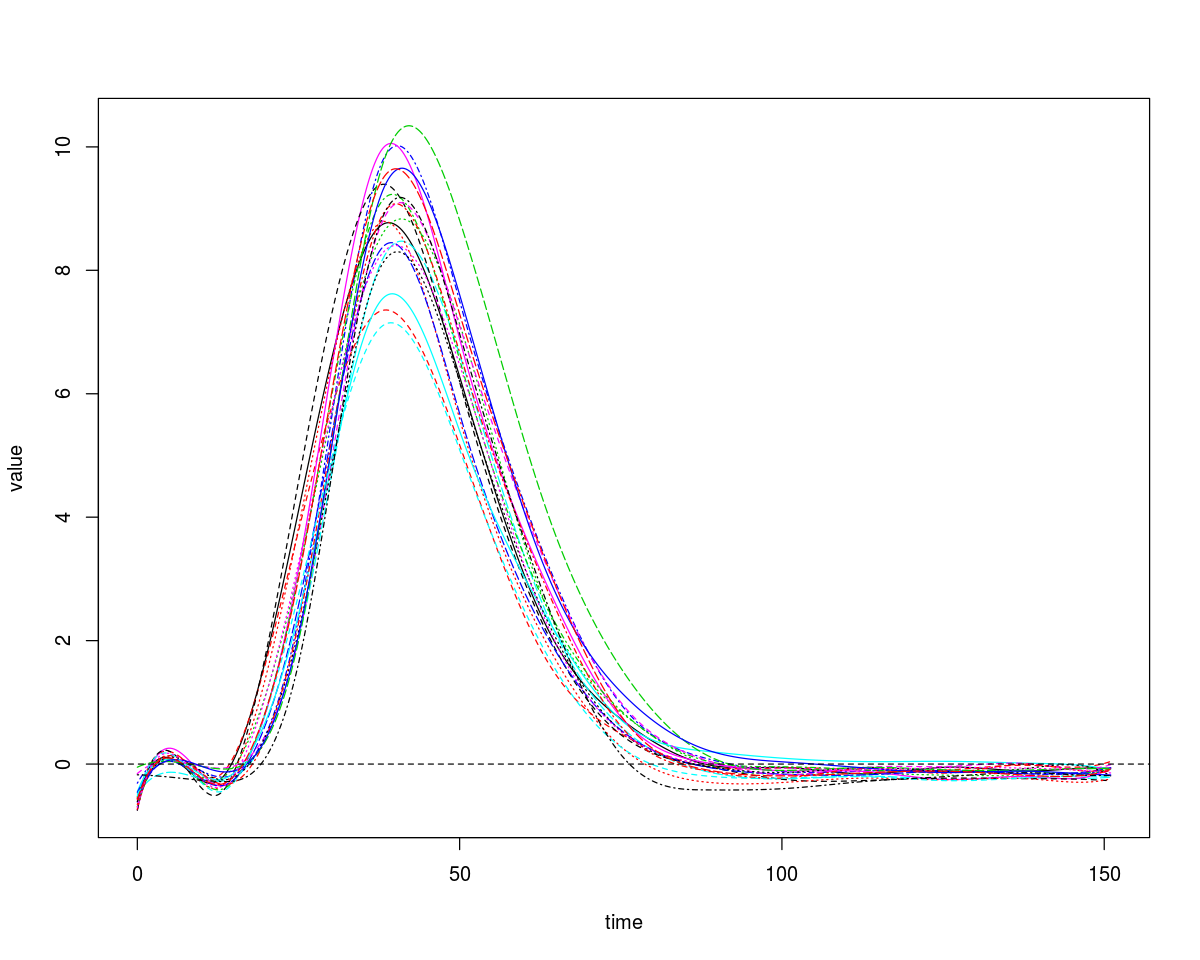

In [42]:
bs.basis <- create.bspline.basis(rangeval=c(0, 151), 
                                 nbasis=15, norder=4)
pinch.fd = smooth.basis(y=pinch, fdParobj=bs.basis)
# pinch.fd <- Data2fd(argvals=1:151, y=pinch, basisobj=bs.basis)
plot(pinch.fd)


## (b)

[1] "done"

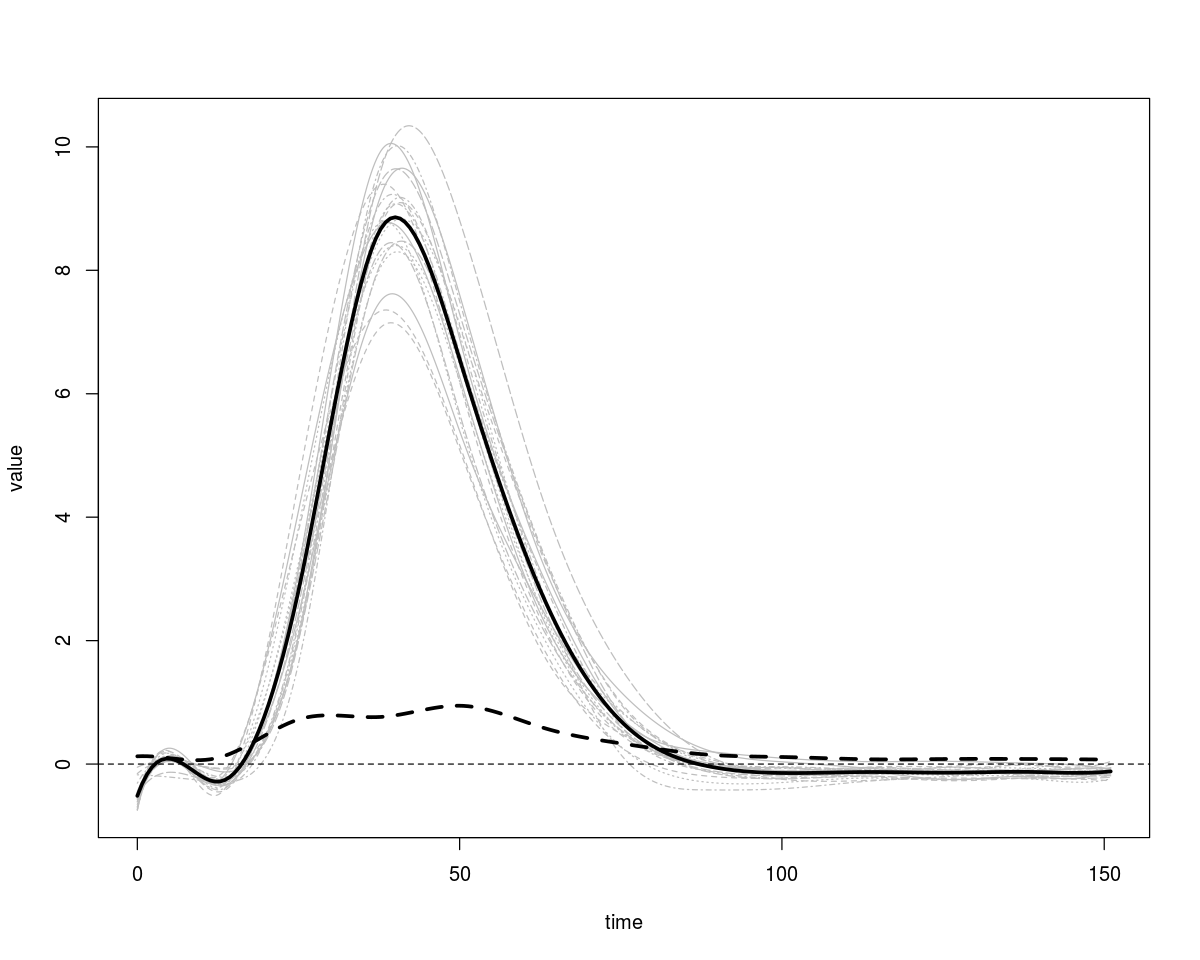

In [44]:
pinch.mean = mean(pinch.fd$fd)
pinch.sd = std.fd(pinch.fd$fd)
plot(pinch.fd, col='gray')
lines(pinch.mean, lwd=3)
lines(pinch.sd, lty=2, lwd=3)

## (c)

In [49]:
pinch.cov <- var.fd(pinch.fd$fd)
grid <- 0:151
cov.mat <- eval.bifd(grid, grid, pinch.cov)

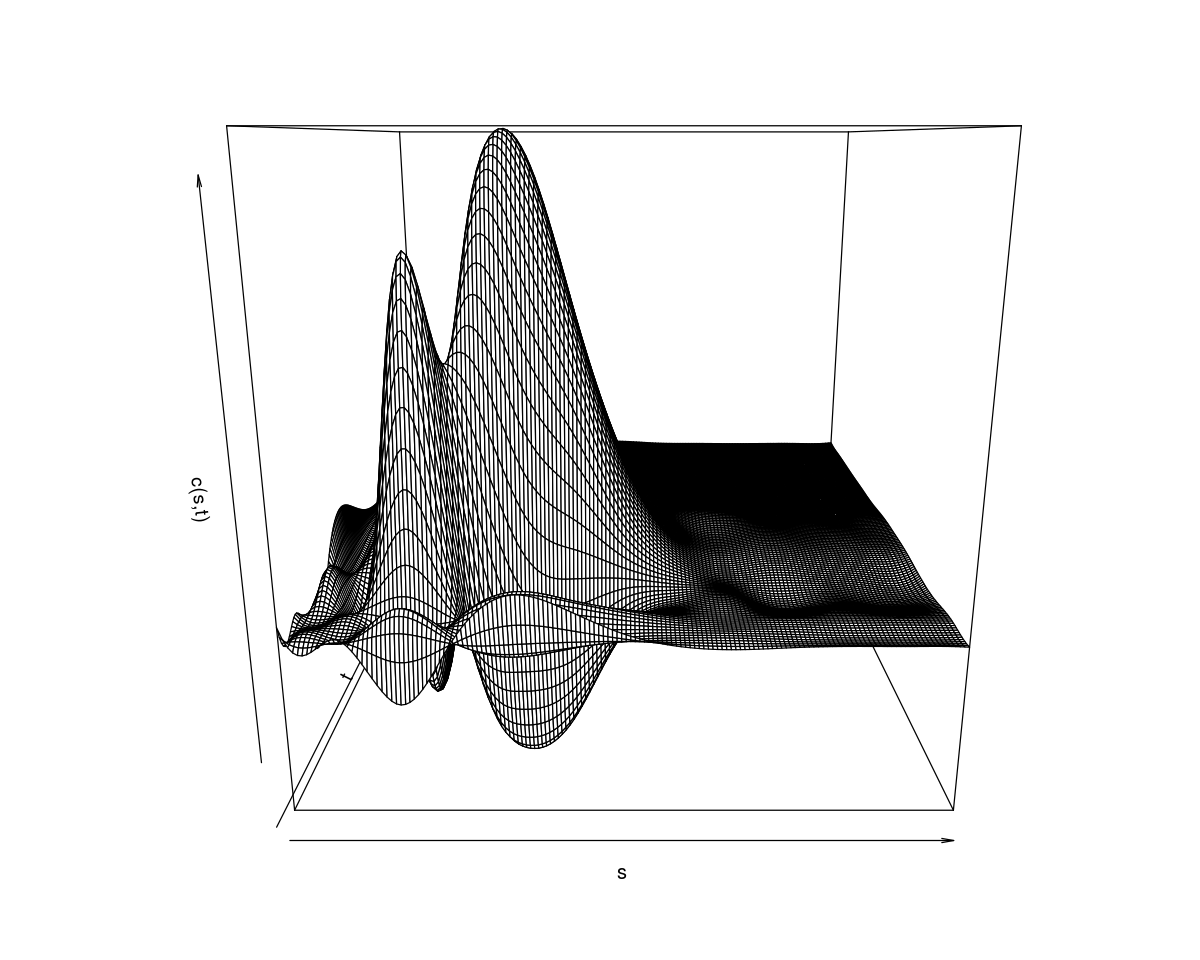

In [52]:
persp(grid, grid, cov.mat, 
      xlab='s', ylab='t', zlab='c(s,t)')

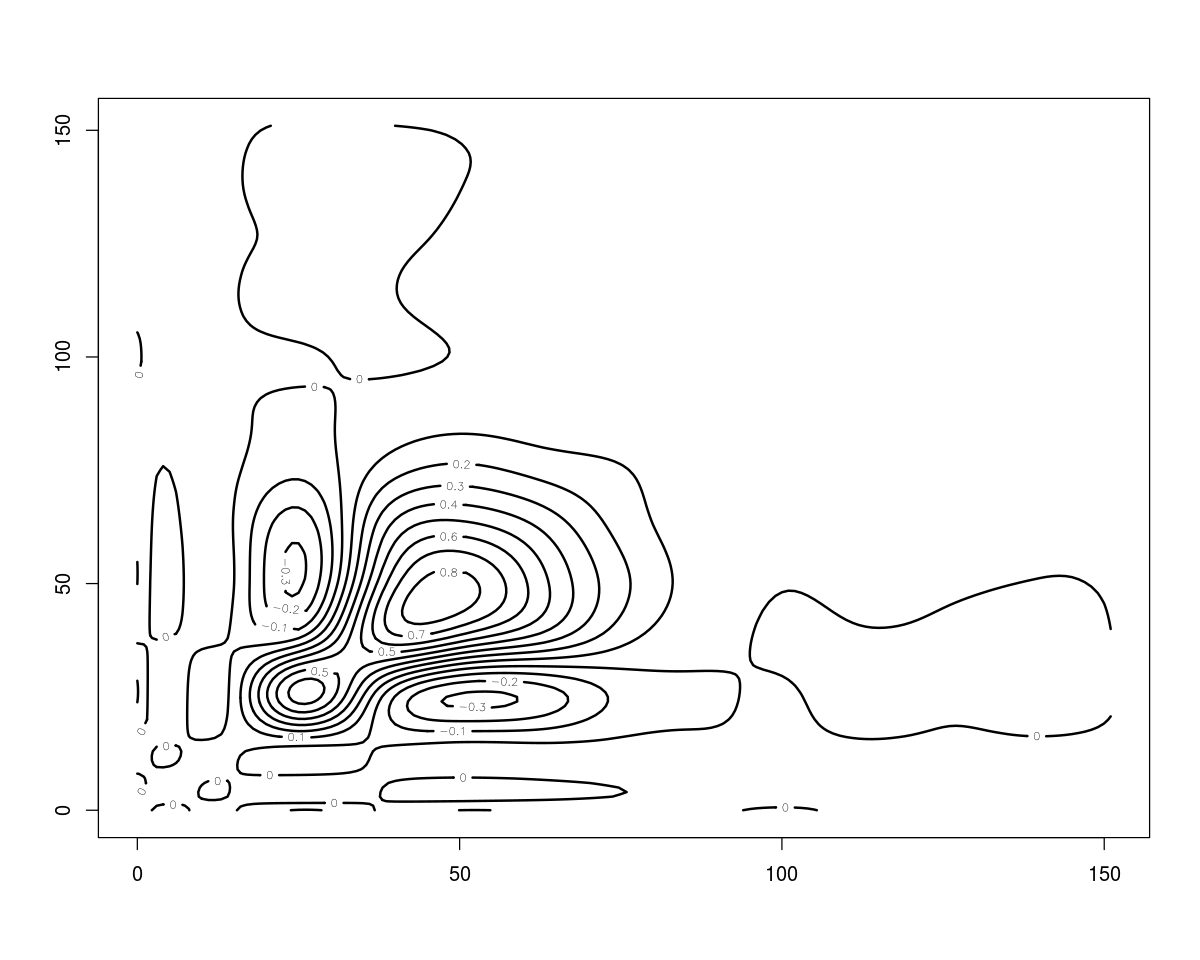

In [54]:
contour(grid, grid, cov.mat, lwd=2)

## (d)

[1] "done"

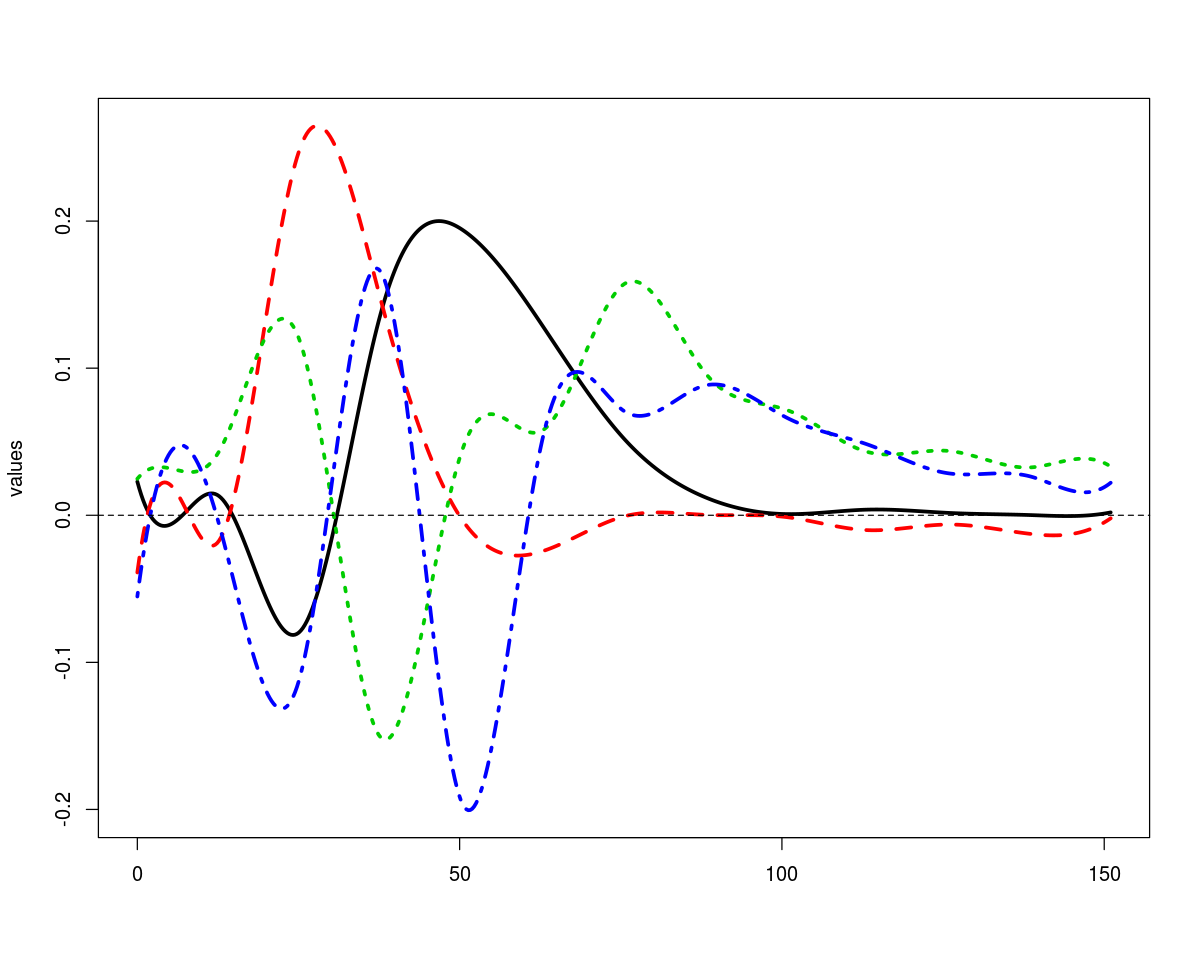

In [57]:
pinch.pca = pca.fd(pinch.fd$fd, nharm=4)
plot(pinch.pca$harmonics, lwd=3)

the first two EFPC can explain 92% of variability.

In [61]:
sum(pinch.pca$varprop[1:2])

[1] 0.9195624

# Problem 2

## (a)

In general treasuries yield is higher in 1982 compared to 2009. The 2009 curve is a $Normal Yield Curve$ which has higher return for long term investments and lower return for short term investments. This kind of yield curve is a sign of expansionary economic policies. The 1982 yield curve is $Humped Yield Curve$, the highest rate of return is for 60 month investment rather than longer term maturities which is a sign of slowing economic growth.

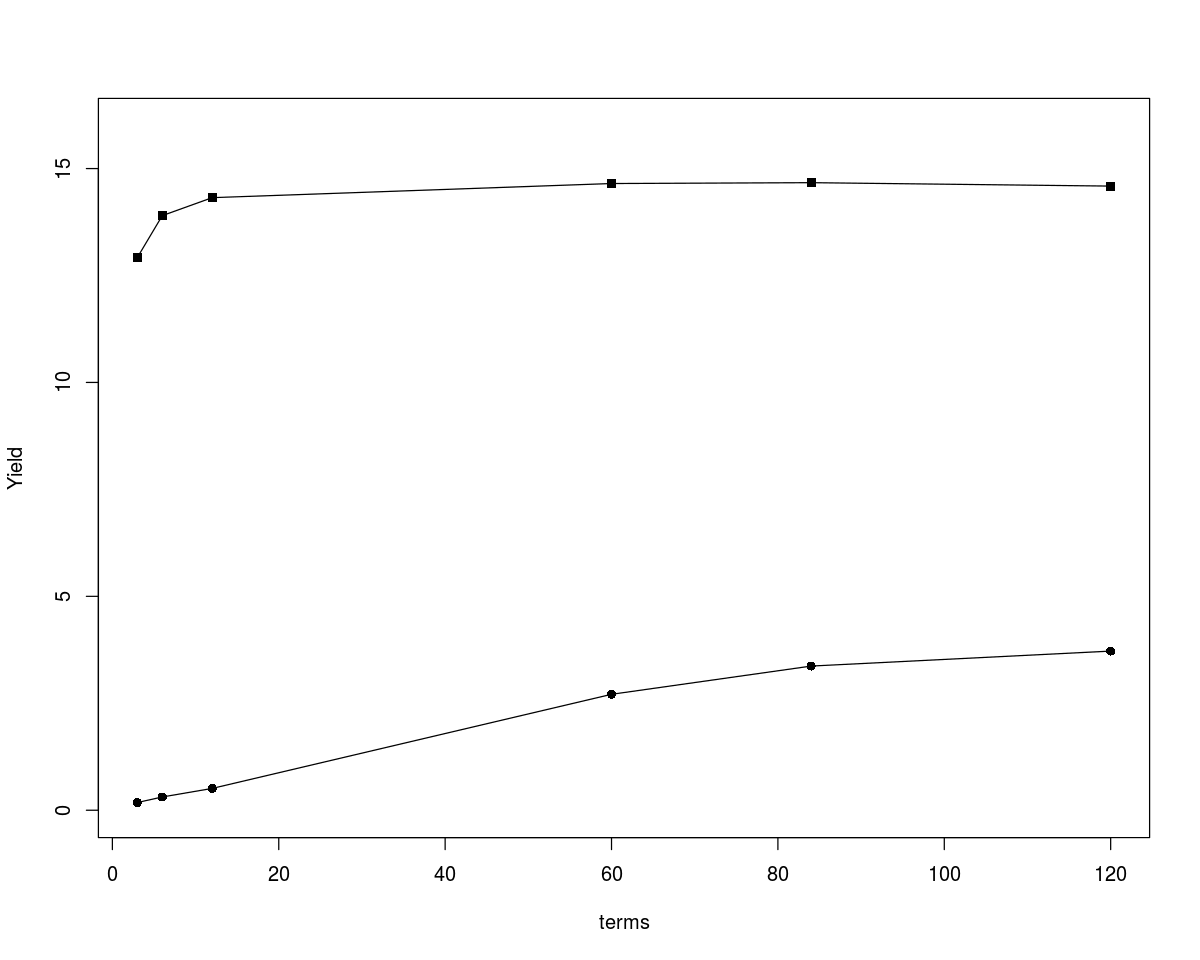

In [112]:
yield = FedYieldcurve; terms = yield$x
plot(terms, yield$y[,1], type='o', pch=15, ylab="Yield", ylim=c(0,16))
points(terms, yield$y[,330], type='o', pch=16)

## (b)

the average yield has a positive slope with lowest return for short and highest return for long term investments. 

[1] "done"

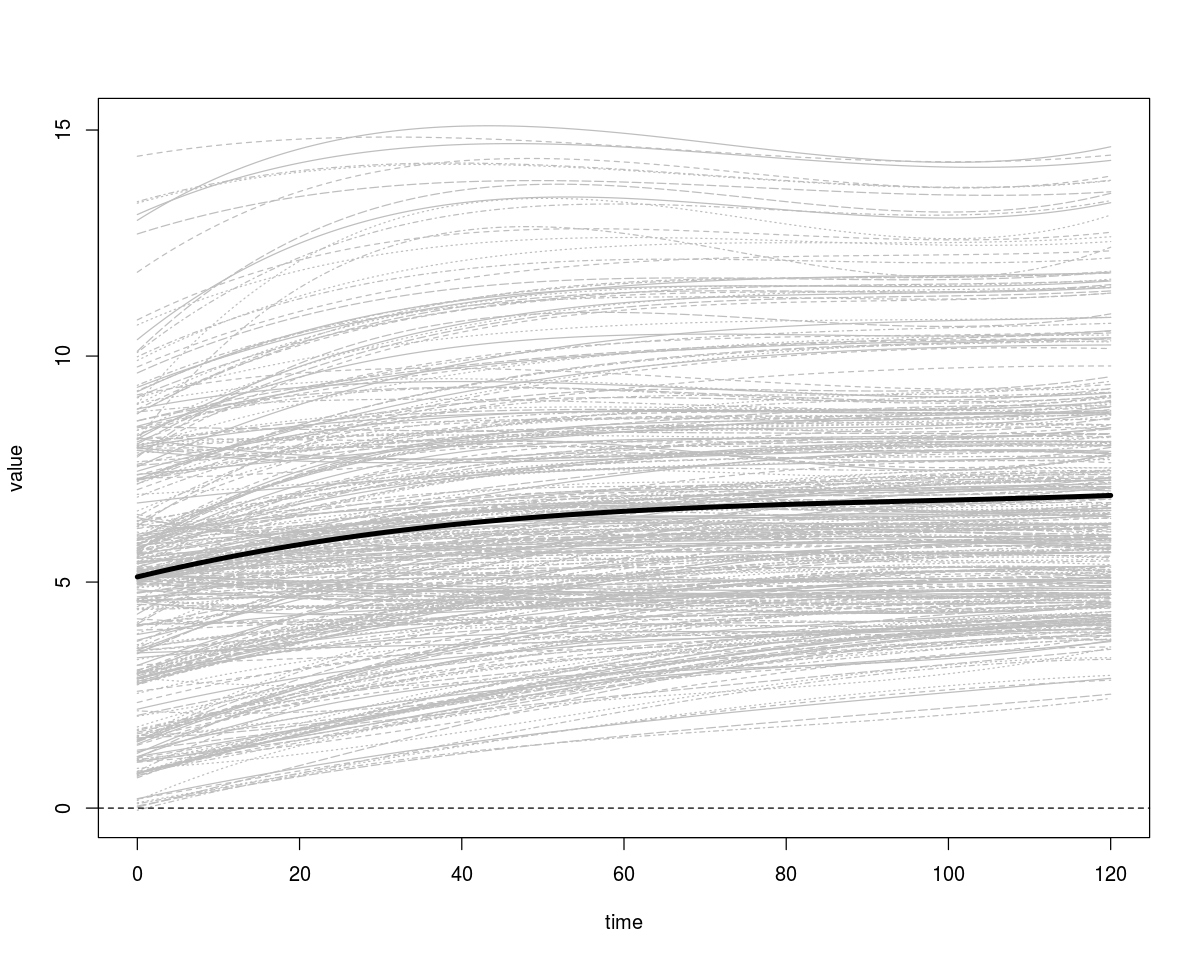

In [25]:
bs.basis <- create.bspline.basis(rangeval=c(0, 120), nbasis=4)
yield.fd = smooth.basis(y=yield$y, argvals=yield$x, fdParobj=bs.basis)

yield.mean = mean(yield.fd$fd)

plot(yield.fd, col='gray')
lines(yield.mean, lwd = 4)


## (c)

[1] "done"

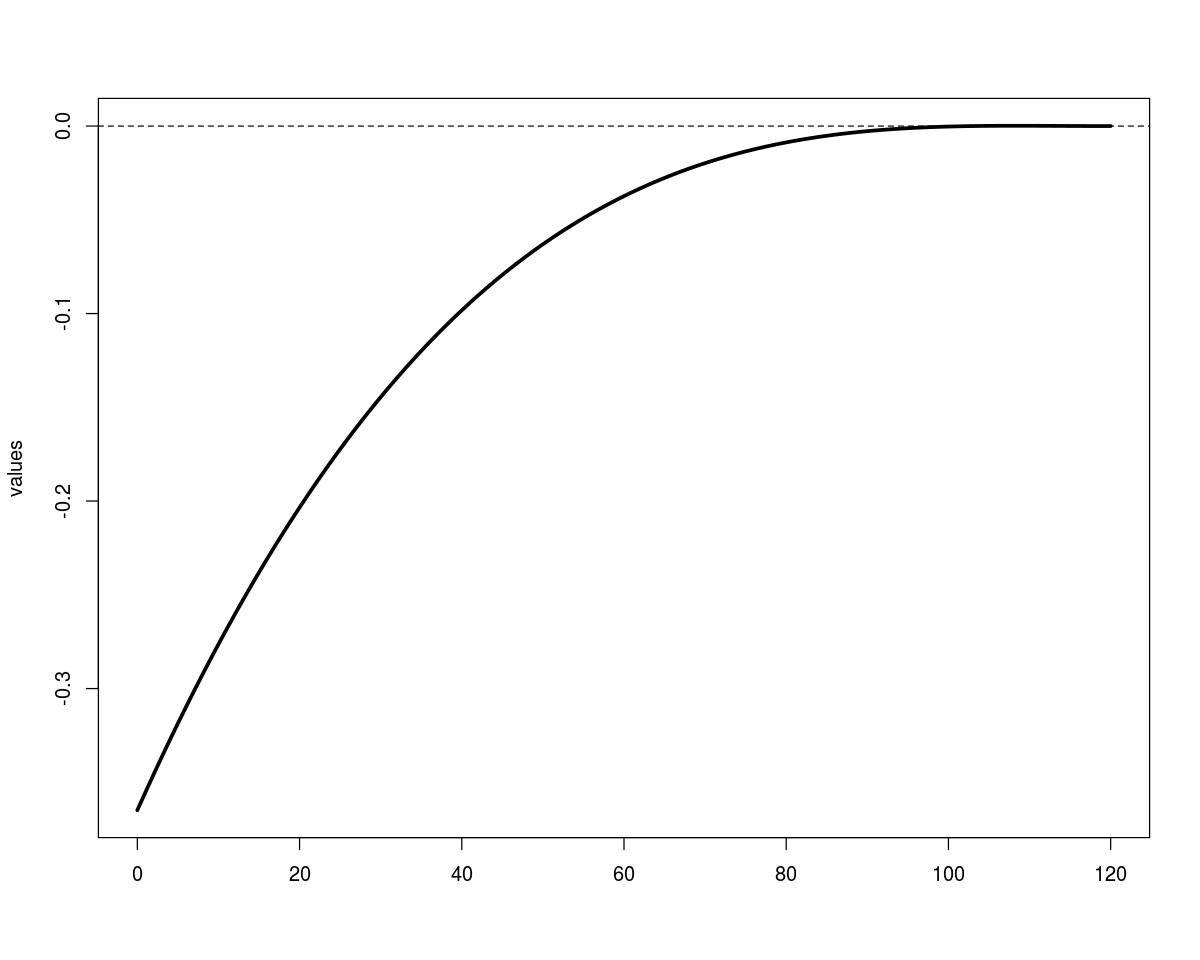

In [30]:
yield.pca = pca.fd(yield.fd$fd, nharm=1, centerfns=T)
plot(yield.pca$harmonics, lwd=3)

the first principle component explains 99.99% variability in the data. The first pricinple components shows that the yield increases with investment target maturity.

In [31]:
yield.pca$varprop

[1] 0.9999783

# Problem 6

$X_n(t) = \sum_m c_{nm}B_m(t)$

## (a) $\bar{x}_{N(t)}(t) = \sum_{m=1}^{M} a_m B_m(t)$

$\bar{x}(t) := \frac{1}{N} \sum_{n=1}^{N} X_n(t)$

$\bar{x}(t) = \frac{1}{N} \sum_n \sum_m c_{mn} B_m(t) = \sum_m \bar{a}_m B_m(t)$

$\downarrow$

$\bar{a}_m = \frac{1}{N} \sum c_{nm}$


## (b) $\hat{c}(t, s) = \sum_{m=1}^{M} \sum_{k=1}^{M} b_{mk} B_m(t) B_k(s)$



$\hat{C}(t,s) = \frac{1}{N-1} \sum_{n=1}^N (X_n(t) -\hat{\mu(t)})(X_n(s) - \hat{\mu}(s))$

$\tilde{c}_{nm} = c_{nm} - \bar{c}_m$


$\hat{C}(t,s) = \frac{1}{N-1} \sum_n \sum_{m1} \sum_{m2} \tilde{c}_{nm_1} \tilde{c}_{nm_2} B_{m_1}(t) B_{m_2}(s)$ 


$\hat{C}(t,s) = \frac{1}{N-1} \sum_{m1} \sum_{m2} (\tilde{c}^T \tilde{c})_{m_1, m_2} B_{m_1}(t) B_{m_2}(s)$ 

$= \sum_{m1} \sum_{m2} (\Sigma_c)_{m_1 m_2} B_{m_1}(t) B_{m_2}(s)$ 

$\downarrow$

$b_{mk} = (\tilde{c}^T \tilde{c})_{m_1, m_2} = (\Sigma_c)_{m_1 m_2}$

# Chapter 2

# Problem 1

Verify equality

\begin{equation}
\int_0^T [L(x) (t)]^2 dt = \pi \omega^5 \sum_{j=2}^J j^2 (j^2 -1)^2 (a_j^2 + b_j^2)
\end{equation}

$x_j (t) = c_0 + \sum_{j=1}^J [a_j + sin(\omega jt) + b_j cos(\omega jt)]$

$x^{(1)} = \sum_{j=1}^J [a_j \omega  j + sin(\omega jt) + b_j  \omega  j  cos(\omega jt)]$

$x^{(2)} = \sum_{j=1}^J [- a_j \omega^2  j^2 + sin(\omega jt) - b_j  \omega^2  j^2  cos(\omega jt)]$

$x^{(3)} = \sum_{j=1}^J [- a_j \omega^3  j^3 + sin(\omega jt) + b_j  \omega^3  j^3  cos(\omega jt)]$

$L(x)(t) = \sum \omega^3 (j^2 -1) [ b sin(\omega jt) - a cos(\omega j t)]$

$[L(x)(t)]^2 = \sum \omega^5 (j^2 -1)^2 [ b^2 sin^2(\omega jt) + a^2 cos^2(\omega j t) - 2 ab cos(\omega jt )sin(\omega j t)]$


$\int_0^T [L(x)(t)]^2 dt = \int_0^T \sum \omega^5 (j^2 -1)^2 [ b^2 sin^2(\omega jt) + a^2 cos^2(\omega j t) - 2 ab cos(\omega jt )sin(\omega j t)] dt = \pi \omega^2 \sum j^2 (j^2 -1)^2 (a_j^2 + b_j^2)$

# Problem 2



## (a)

[1] "done"

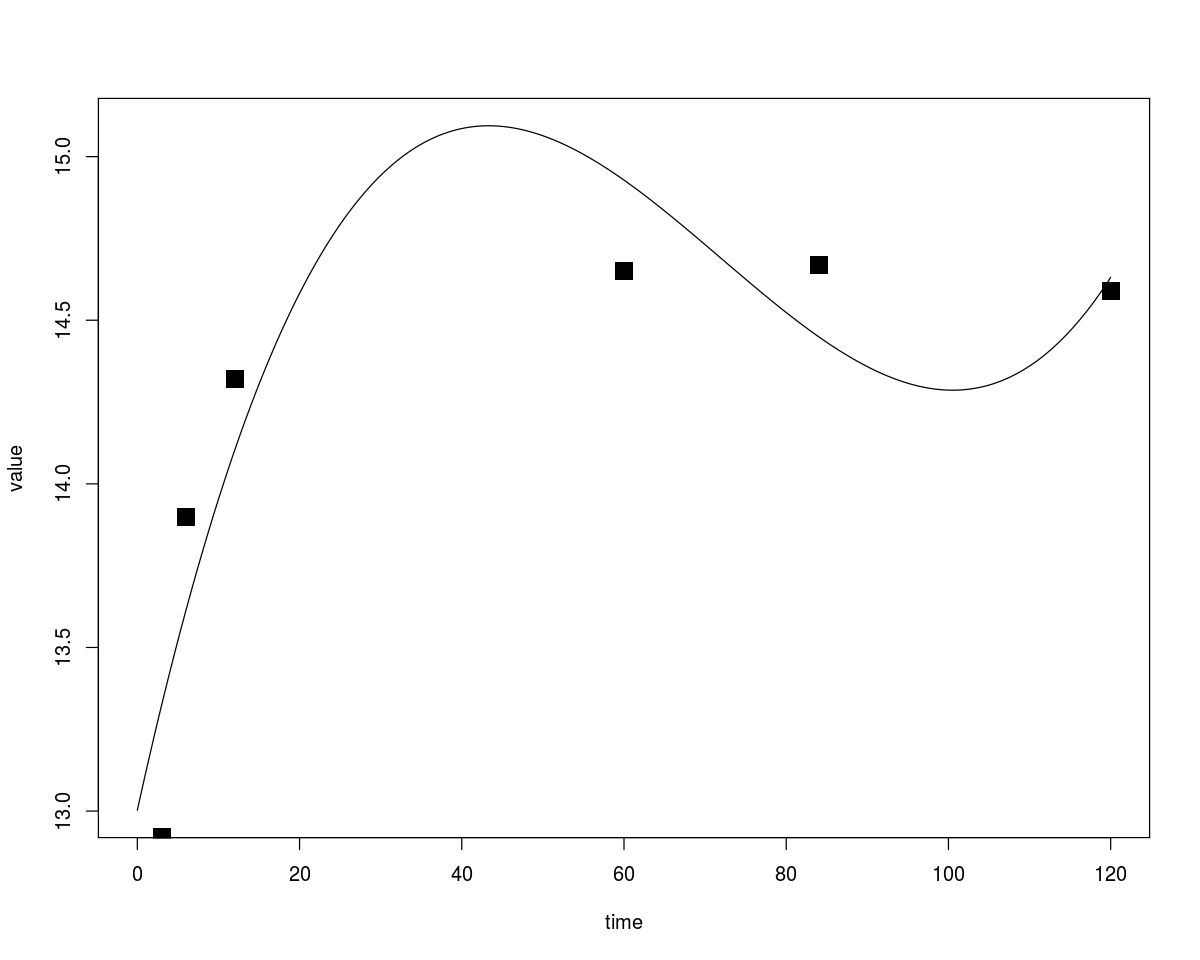

In [109]:
yield <- FedYieldcurve; terms = yield$x
jan_yield <- yield$y[,1]

bs.basis <- create.bspline.basis(rangeval=c(0, 120), nbasis=4)
yield.smooth <- smooth.basis(jan_yield, argvals=yield$x,  fdParobj=bs.basis)
plot(yield.smooth)
points(yield$x, jan_yield, cex=2, pch=15)

## (b)

[1] "done"

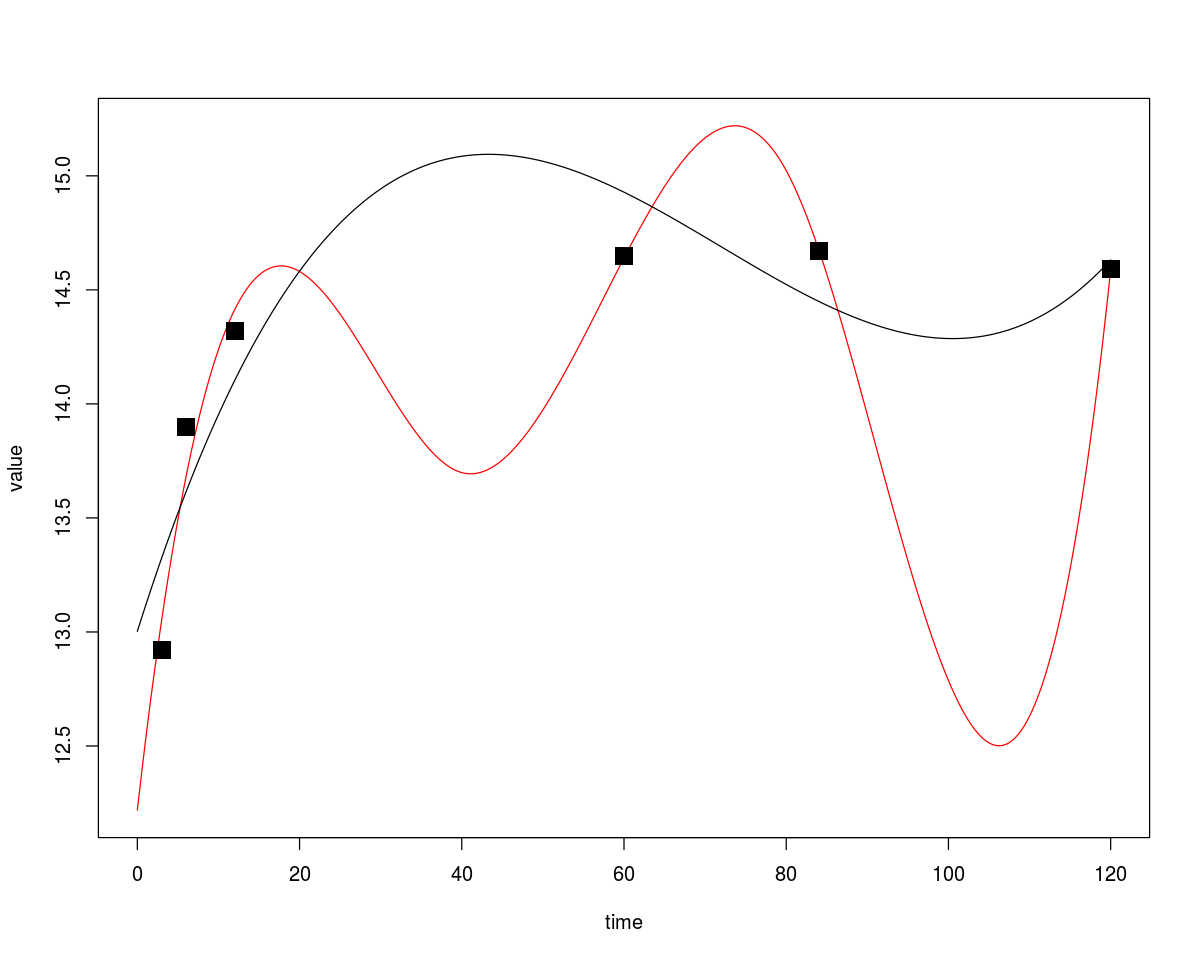

In [150]:
bs.basis <- create.bspline.basis(rangeval=c(0, 120), nbasis=6)
lfd2 <- int2Lfd(2)
Par <- fdPar(bs.basis, Lfdobj = lfd2,  lambda = 1)
yield.penalized.smooth <- smooth.basis(jan_yield, argvals=yield$x,  fdParobj=Par)
plot(yield.penalized.smooth, col='red')
lines(yield.smooth)
points(yield$x, jan_yield, cex=2, pch=15)

## (c)

$\lambda$ around 20 has the best fit.

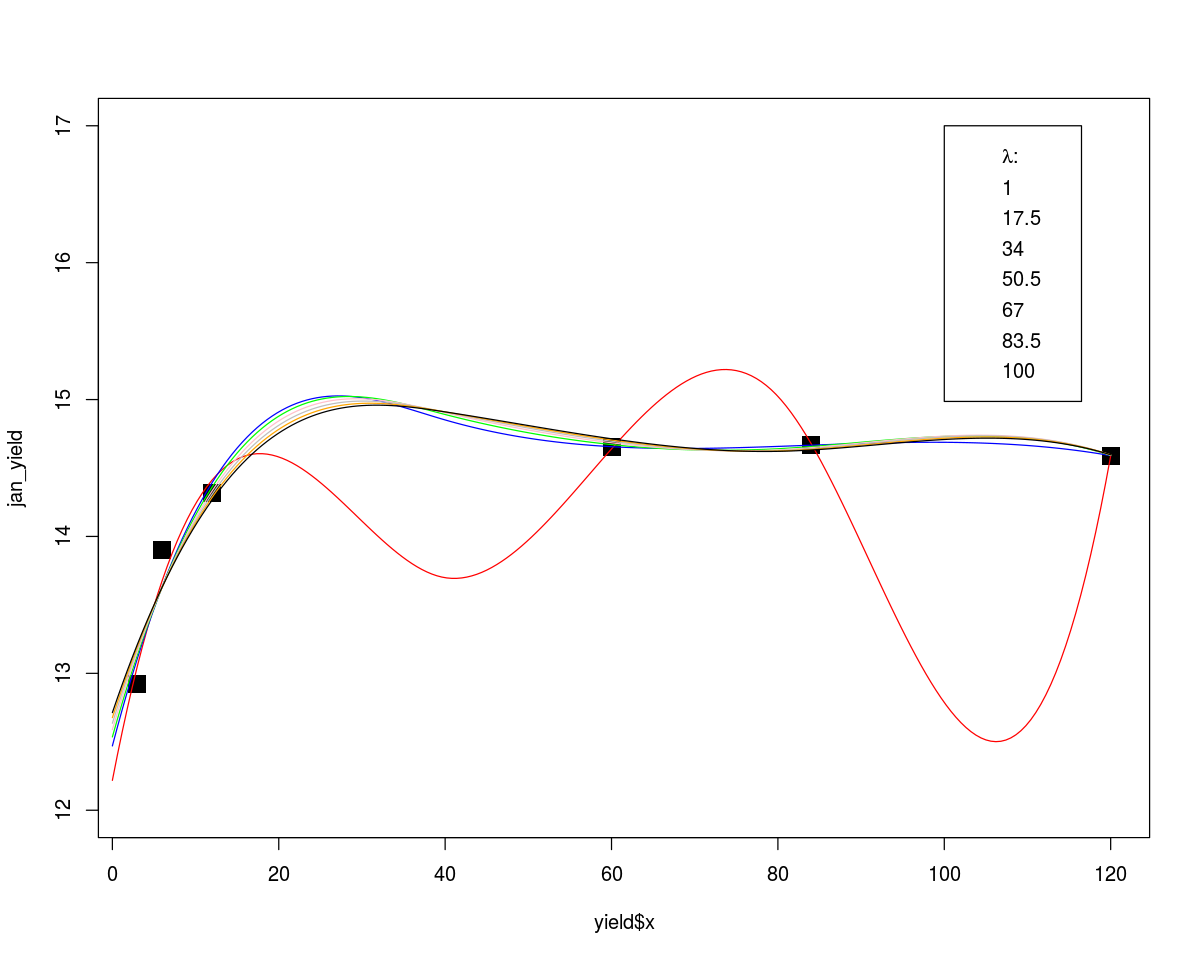

In [158]:
bs.basis <- create.bspline.basis(rangeval=c(0, 120), nbasis=6)
lfd2 <- int2Lfd(2)

plot(yield$x, jan_yield, ylim=c(12,17), pch=15, cex=2)
for(i in 1:7 ){
    lambdas = seq(1,100, length.out = 7)
    color = c('red', 'blue', 'green', 'pink', 'gray', 'orange', 'black')
    Par <- fdPar(bs.basis, Lfdobj = lfd2, lambda = lambdas[i])
    yield.penalized.smooth <- smooth.basis(jan_yield, argvals=yield$x,  fdParobj=Par)
    lines(yield.penalized.smooth$fd, col=color[i], )
}

legend(100, 17, c(expression(paste(lambda,':')), round(lambdas,2)))

# Problem 5

\begin{equation}
    f(x) =
    \begin{cases}
           a_0 exp{ (1 - (\frac{x-c_0}{r_0})^2)^{-1}}) & \quad \text{if } |x-c_0| <r_0\\
           0  & \quad \text{otherwise}\\
     \end{cases}
\end{equation}

## (a)

[1] "done"

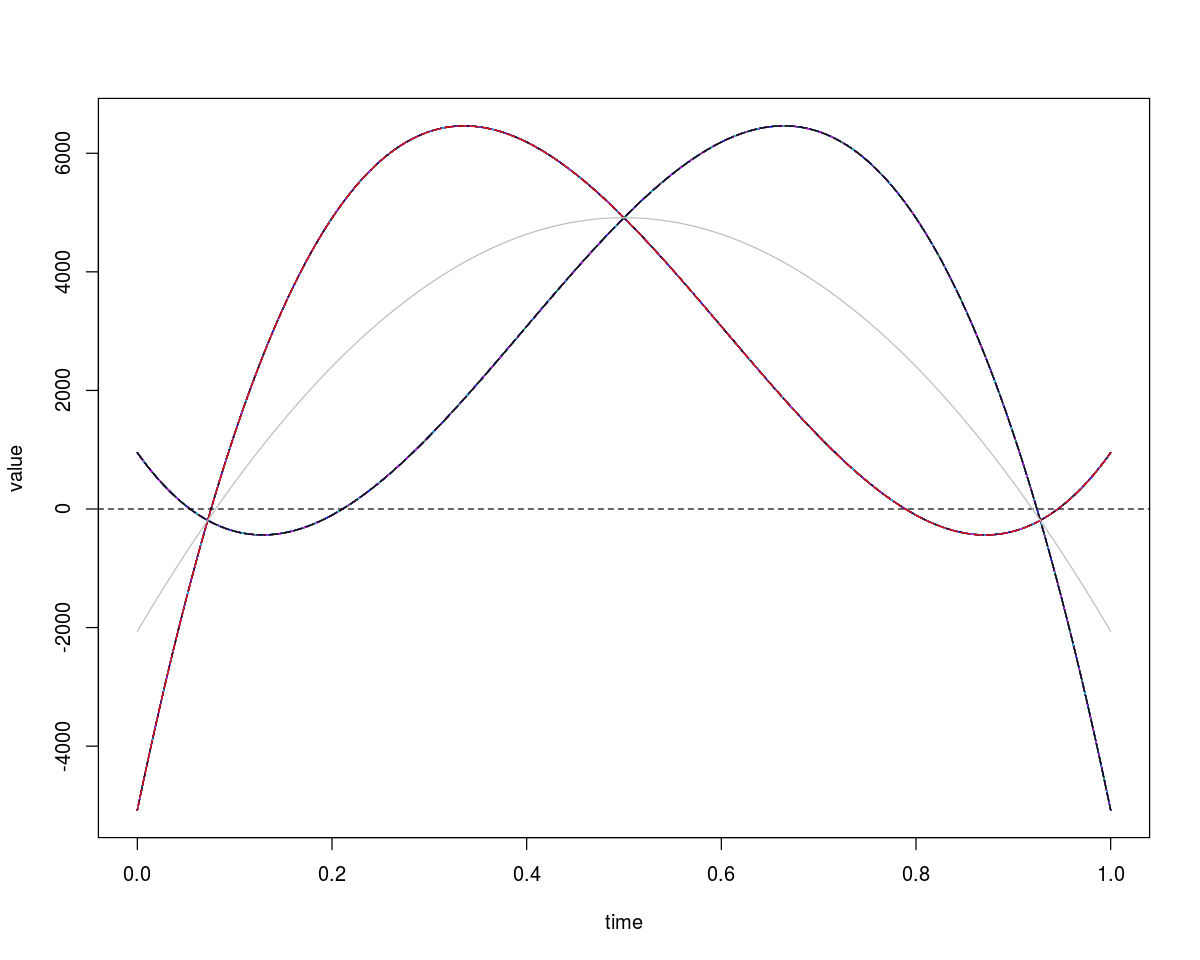

In [72]:

set.seed(1234); library(fields); library(expm) 
m<-50; times<-seq(0,1,length=m) 

range<-1; nu1=1/2; sig2<-1; nu2=3/2
d_mat<-abs(outer(times,times,"-"))

sigma <- apply(d_mat,c(1,2),FUN=Matern,range=range,nu=nu1) 

bump <- function(x, c0, r0, a0){
    
    output <- a0 * exp((1 - ((x - c0)/r0)^2)^-1)
    output}

bump1 <- bump(seq(0,1, length.out = 50), 3/8, 1/4, 5)
bump2 <- bump(seq(0,1, length.out = 50), 5/8, 1/4, 5)


X1 <- t(mvrnorm(25, bump1, sigma))
X2 <- t(mvrnorm(25, bump2, sigma))
X <- cbind(X1,X2)

basis <- create.bspline.basis(range=c(0,1), nbasis = 4)

smooth <- smooth.basis(X, argvals = seq(0,1, length.out = 50), fdParobj = basis )

smooth.mean <- mean(smooth$fd)

plot(smooth, cex=2, pch=22)
lines(smooth.mean, cex = 1, col='gray', pch=22)

## (b) 

The register.fd function by defult forces the registered functions to become close to the mean. 
The amplitude of the two curves are different in the registered version and the curvature  at the tail of the two curves is gone.

In [82]:
registered <- register.fd(yfd =smooth$fd, dbglev=0)

Progress:  Each dot is a curve
..................................................


[1] "done"

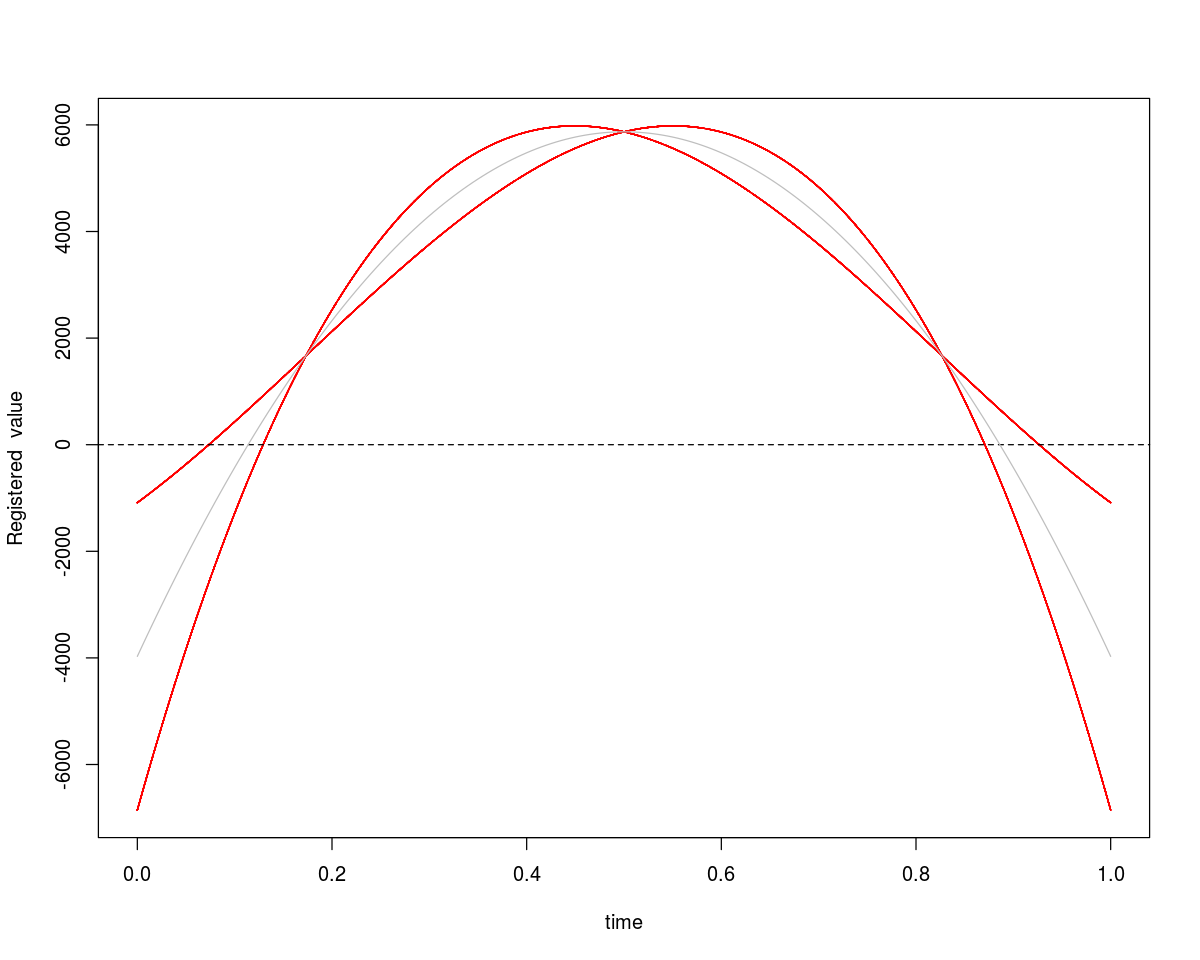

In [83]:
plot(registered$regfd, col='red')
registered.mean <- mean(registered$regfd)
lines(registered.mean, col='gray')

## (c)

[1] "done"

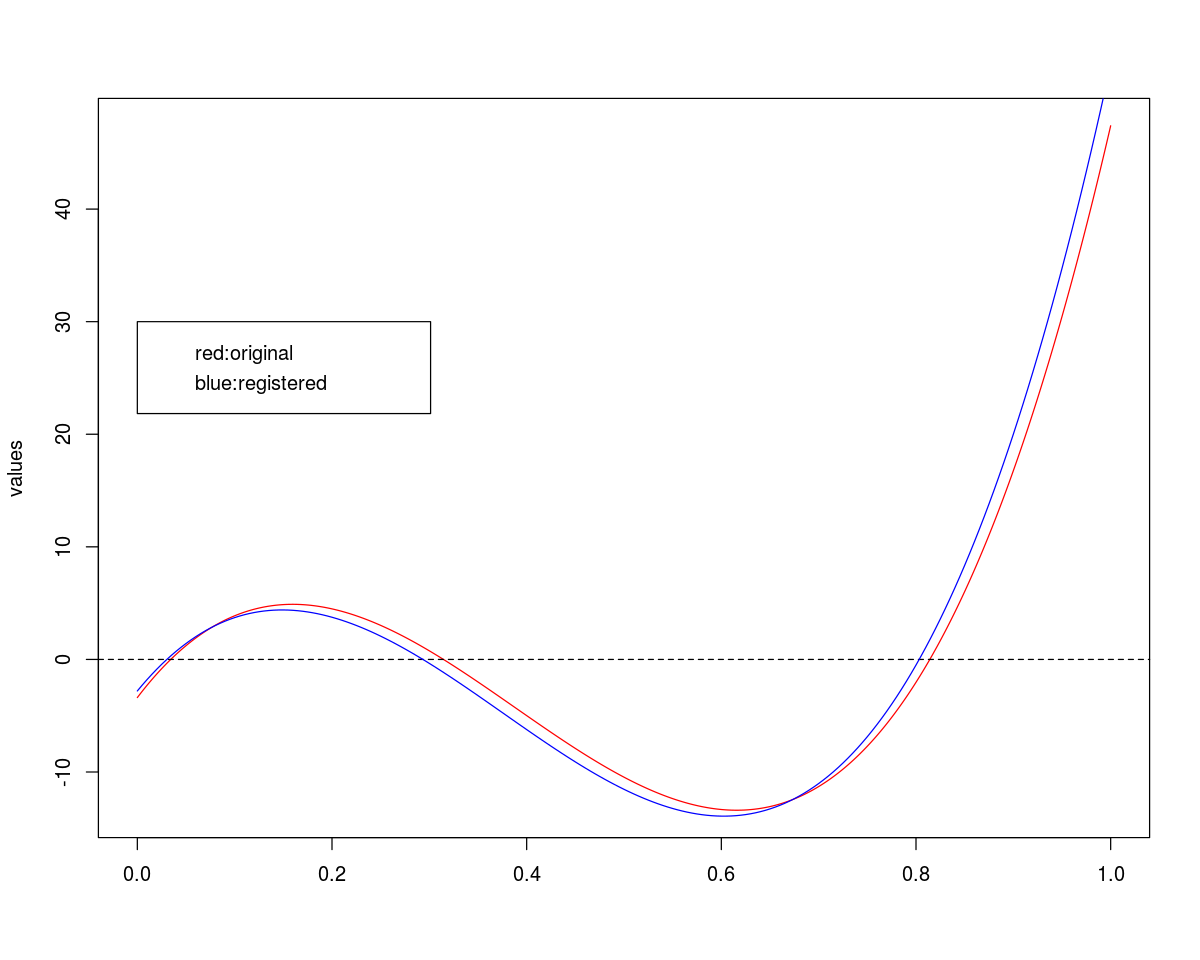

In [91]:
smooth.pca = pca.fd(smooth$fd, nharm=1, centerfns=T)

registered.pca = pca.fd(registered$regfd, nharm=1, centerfns=T)


plot(smooth.pca$harmonics, col='red')
lines(registered.pca$harmonics, col='blue')
legend(0, 30, c("red:original", "blue:registered"))

#### original curve scores:

In [108]:
df <- data.frame(label = c(rep(0, 25), rep(1,25)),
                score = rbind(smooth.pca$scores))
model <- lm(label ~ score, data=df)
summary(model)


Call:
lm(formula = label ~ score, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.318e-04 -6.997e-05  6.988e-06  6.746e-05  3.049e-04 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.000e-01  1.590e-05   31448   <2e-16 ***
score       5.348e-05  1.701e-09   31448   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0001124 on 48 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 9.89e+08 on 1 and 48 DF,  p-value: < 2.2e-16


#### registred scores:

In [110]:
df <- data.frame(label = c(rep(0, 25), rep(1,25)),
                score = rbind(registered.pca$scores))
model <- lm(label ~ score, data=df)
summary(model)


Call:
lm(formula = label ~ score, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0003554 -0.0001521  0.0000182  0.0001155  0.0004392 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.000e-01  2.567e-05   19479   <2e-16 ***
score       6.232e-05  3.199e-09   19479   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0001815 on 48 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 3.794e+08 on 1 and 48 DF,  p-value: < 2.2e-16


The slope p-value is significant in both cases. 

## (d)

problem may arise when similarity is calculated on the intersection between the dmains of wraped curves.